<a href="https://colab.research.google.com/github/siminsharif/st/blob/main/SpecialTopic_HM02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datasets import load_dataset

# Load the 'yelp_review_full' dataset using the 'train' split
dataset = load_dataset('yelp_review_full', split='train')


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

yelp_review_full/train-00000-of-00001.pa(…):   0%|          | 0.00/299M [00:00<?, ?B/s]

yelp_review_full/test-00000-of-00001.par(…):   0%|          | 0.00/23.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
import pandas as pd

# Convert Hugging Face dataset to pandas DataFrame
yelp_df = dataset.to_pandas()


In [ ]:
# Sample 50,000 random entries
sample_size = 50000

# Ensure sample_size does not exceed the total number of rows in yelp_df
actual_sample_size = min(sample_size, len(yelp_df))

# Randomly sample the dataset
yelp_df_sampled = yelp_df.sample(n=actual_sample_size, random_state=42).reset_index(drop=True)


In [ ]:
from datasets import load_dataset
import pandas as pd

# 1. Load the 'yelp_review_full' dataset (train split)
dataset = load_dataset('yelp_review_full', split='train')

# 2. Convert to pandas DataFrame
yelp_df = dataset.to_pandas()

# 3. Sample 50,000 random entries
sample_size = 50000
actual_sample_size = min(sample_size, len(yelp_df))  # Ensure sample size does not exceed total rows

yelp_df_sampled = yelp_df.sample(n=actual_sample_size, random_state=42).reset_index(drop=True)


In [ ]:
# Create a new column 'sentiment' based on the star rating
yelp_df_sampled['sentiment'] = yelp_df_sampled['label'].apply(lambda x: 'positive' if x >= 2 else 'negative')


سناریو ۱: Line Chart - روند فعالیت کاربران

In [ ]:
# Create a 'sentiment' column: 3,4,5 stars → positive, 1,2 stars → negative
yelp_df_sampled['sentiment'] = yelp_df_sampled['label'].apply(lambda x: 'positive' if x >= 2 else 'negative')

# Quick check of class distribution
print(yelp_df_sampled['sentiment'].value_counts())


sentiment
positive    29985
negative    20015
Name: count, dtype: int64


In [ ]:
# Number of reviews
print("Total reviews:", len(yelp_df_sampled))

# Average length of reviews
yelp_df_sampled['review_length'] = yelp_df_sampled['text'].apply(len)
print("Average review length:", yelp_df_sampled['review_length'].mean())


Total reviews: 50000
Average review length: 732.18974


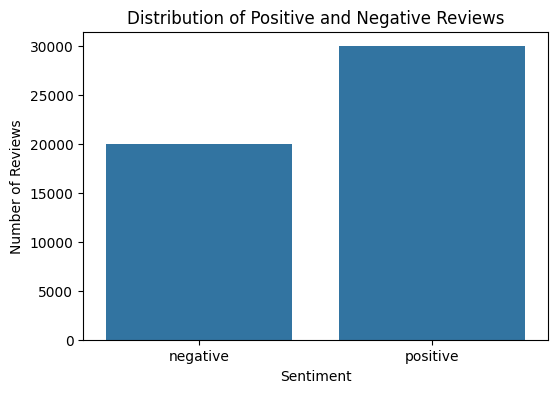

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=yelp_df_sampled, x='sentiment')
plt.title("Distribution of Positive and Negative Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


سناریو ۲: Scatter Plot - رابطه محبوبیت و کیفیت

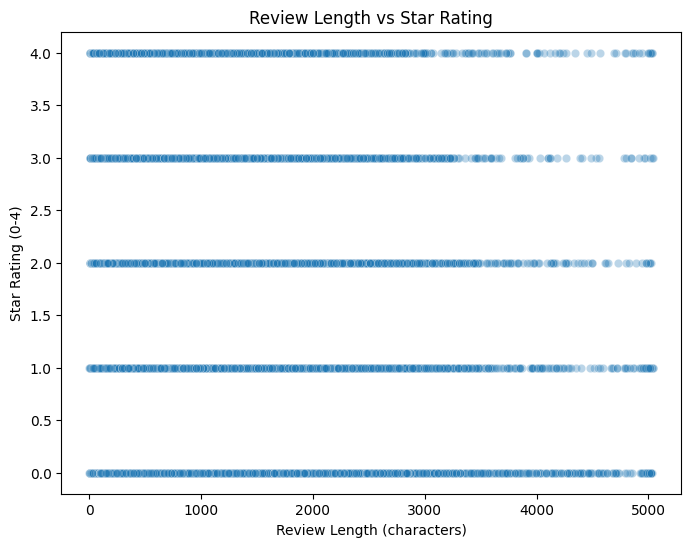

In [ ]:
# Scatter plot: review length vs star rating
plt.figure(figsize=(8,6))
sns.scatterplot(data=yelp_df_sampled, x='review_length', y='label', alpha=0.3)
plt.title('Review Length vs Star Rating')
plt.xlabel('Review Length (characters)')
plt.ylabel('Star Rating (0-4)')
plt.show()


سناریو ۳: Rel Plot - مقایسه رابطه بین دو شهر

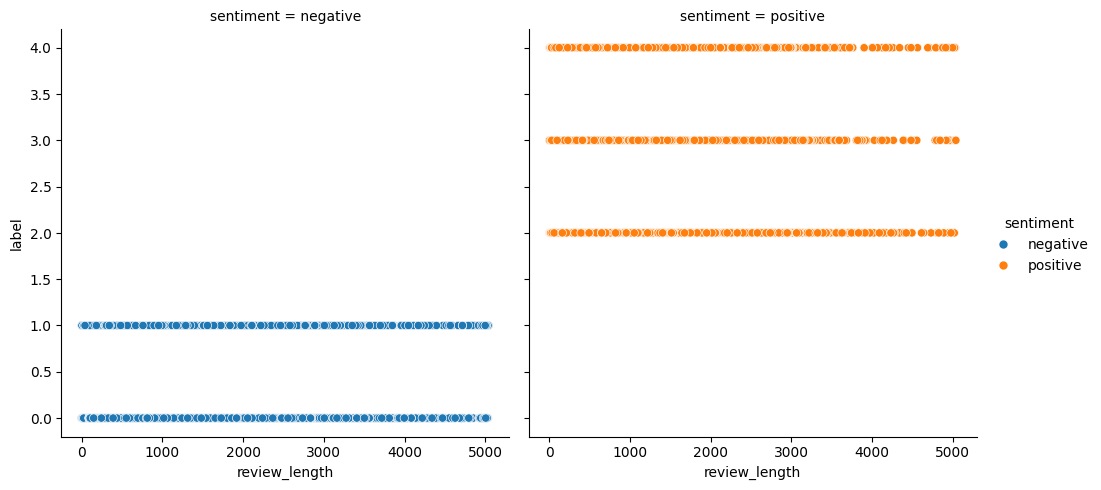

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create two subsets: positive and negative reviews
subset = yelp_df_sampled[yelp_df_sampled['sentiment'].isin(['positive', 'negative'])]

# Scatter plot: review length vs star rating, separated by sentiment
sns.relplot(
    data=subset,
    x='review_length',
    y='label',
    hue='sentiment',
    kind='scatter',
    col='sentiment',  # creates two side-by-side plots
    height=5,
    aspect=1
)
plt.show()


سناریو ۴: Bar Plot - مقایسه کیفیت بر اساس قیمت

/tmp/ipython-input-314648159.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_length_per_star, x='label', y='review_length', palette="viridis")


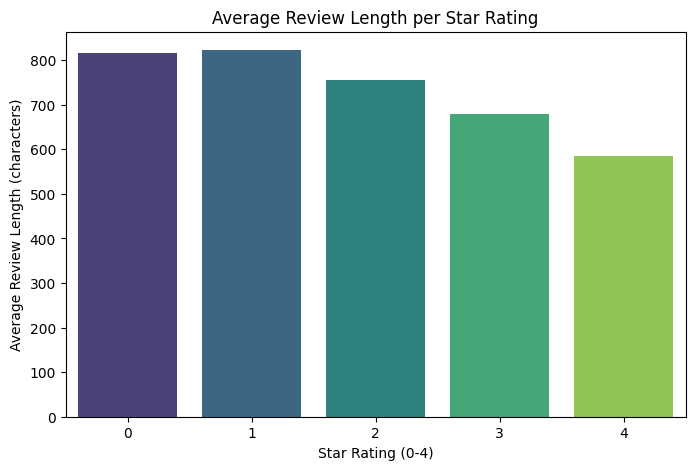

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average review length per star rating
avg_length_per_star = yelp_df_sampled.groupby('label')['review_length'].mean().reset_index()

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(data=avg_length_per_star, x='label', y='review_length', palette="viridis")
plt.title("Average Review Length per Star Rating")
plt.xlabel("Star Rating (0-4)")
plt.ylabel("Average Review Length (characters)")
plt.show()


سناریو ۵: Count Plot - توزیع امتیازهای کاربران

/tmp/ipython-input-492087176.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=yelp_df_sampled, x='label', palette='pastel')


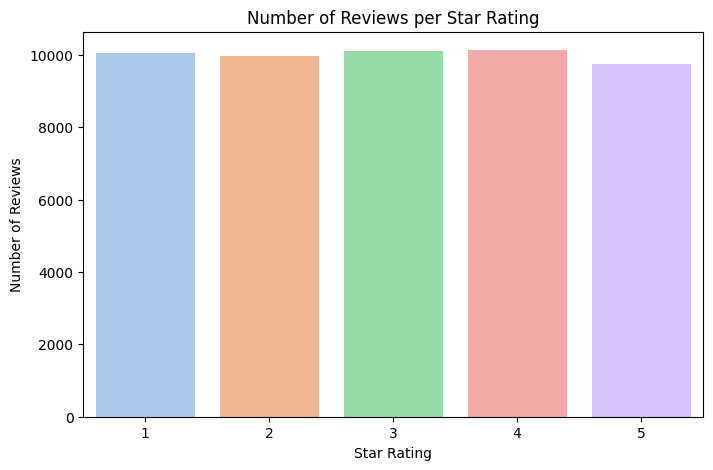

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of star ratings
plt.figure(figsize=(8,5))
sns.countplot(data=yelp_df_sampled, x='label', palette='pastel')

# Adjust x-axis labels from 1 to 5 stars
plt.xticks(ticks=[0,1,2,3,4], labels=[1,2,3,4,5])
plt.title("Number of Reviews per Star Rating")
plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")
plt.show()


سناریو ۶: Cat Plot - مقایسه توزیع امتیازها در دسته‌های غذایی

/tmp/ipython-input-3706035669.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


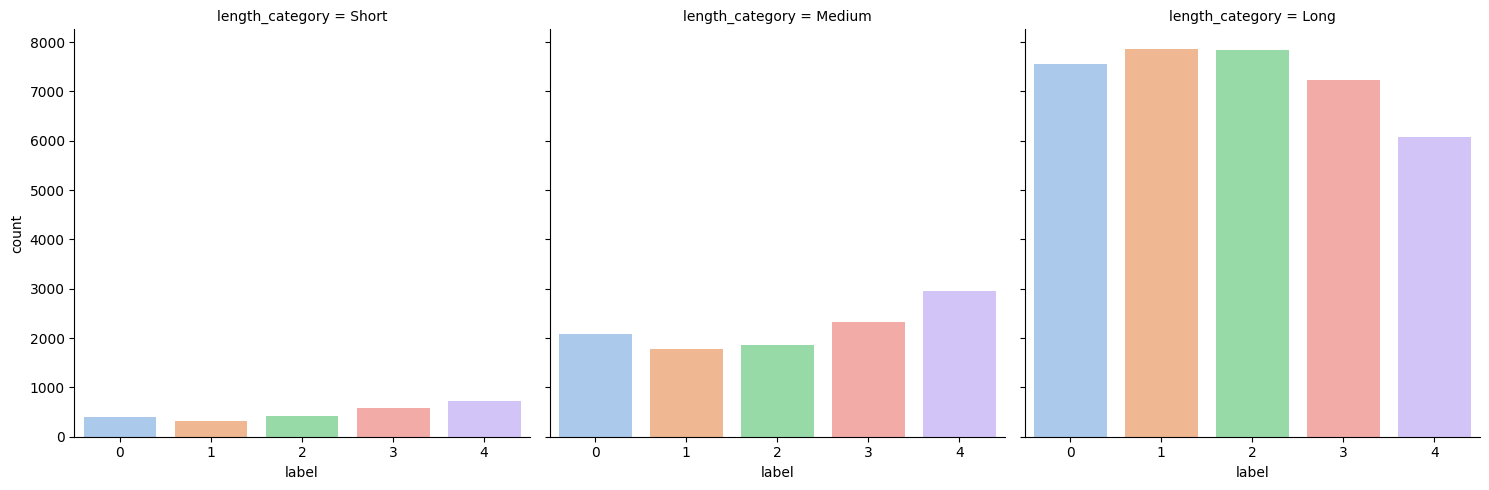

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create review length categories
yelp_df_sampled['length_category'] = pd.cut(
    yelp_df_sampled['review_length'],
    bins=[0, 100, 300, 10000],
    labels=['Short', 'Medium', 'Long']
)

# Catplot: star rating distribution per length category
sns.catplot(
    data=yelp_df_sampled,
    x='label',
    col='length_category',
    kind='count',
    palette='pastel',
    col_order=['Short', 'Medium', 'Long']
)

plt.show()


سناریو ۷: Dist Plot - توزیع فعالیت کاربران

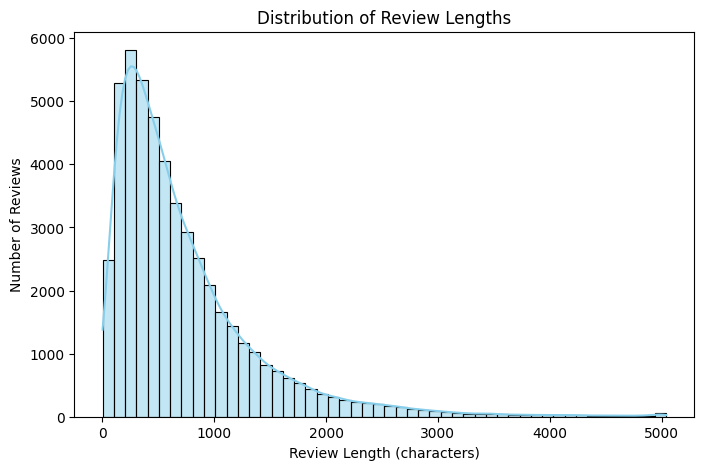

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram / distribution of review lengths
plt.figure(figsize=(8,5))
sns.histplot(yelp_df_sampled['review_length'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length (characters)")
plt.ylabel("Number of Reviews")
plt.show()


سناریو ۸: KDE Plot - چگالی توزیع امتیازها

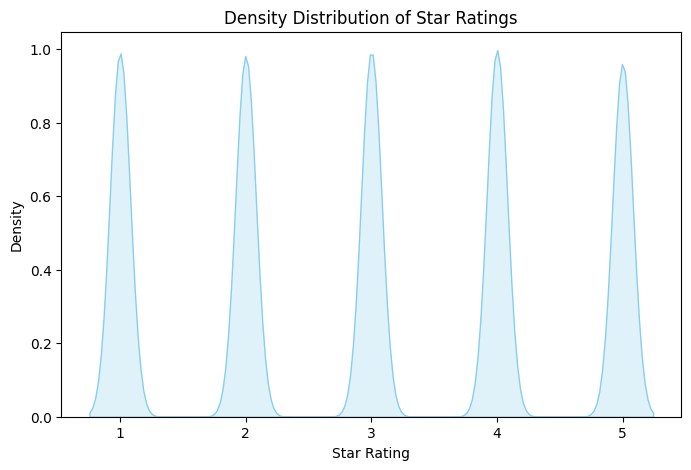

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# KDE plot of star ratings
plt.figure(figsize=(8,5))
sns.kdeplot(
    data=yelp_df_sampled,
    x='label',   # 0-4, corresponds to 1-5 stars
    bw_adjust=0.5,  # controls smoothness
    fill=True,
    color='skyblue'
)

# Adjust x-axis to show 1-5 stars
plt.xticks(ticks=[0,1,2,3,4], labels=[1,2,3,4,5])
plt.title("Density Distribution of Star Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Density")
plt.show()


سناریو ۹: Swarm Plot - توزیع امتیازها در دسته‌های کسب‌وکار

/tmp/ipython-input-461328556.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


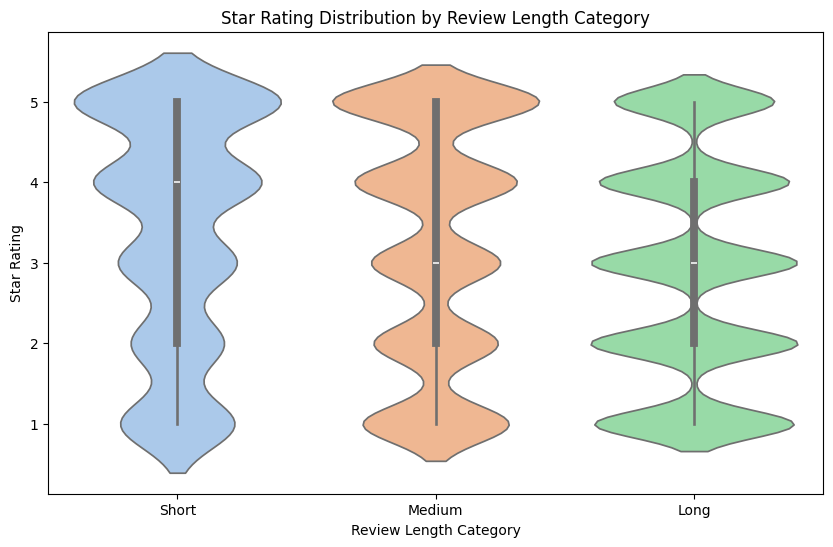

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Violin plot for star rating distribution by review length category
sns.violinplot(
    data=yelp_df_sampled,
    x='length_category',  # Short, Medium, Long
    y='label',
    palette='pastel'
)

# Adjust y-axis to show 1-5 stars
plt.yticks([0,1,2,3,4], [1,2,3,4,5])
plt.title("Star Rating Distribution by Review Length Category")
plt.xlabel("Review Length Category")
plt.ylabel("Star Rating")
plt.show()


سناریو ۱۰: Strip Plot - توزیع امتیازها در مناطق مختلف شهر

/tmp/ipython-input-1217825205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


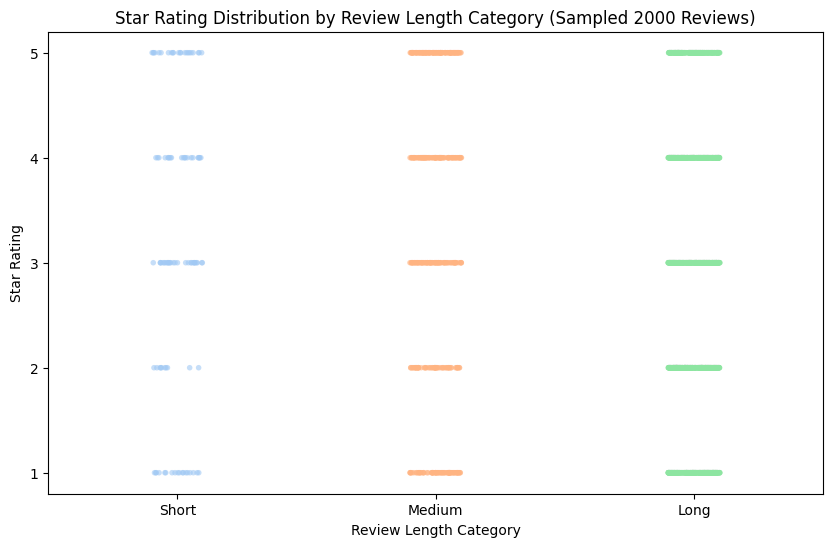

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Stripplot: star rating distribution by review length category
sns.stripplot(
    data=yelp_df_sampled.sample(2000, random_state=42),  # sample to keep plot fast
    x='length_category',  # Short, Medium, Long
    y='label',
    jitter=True,
    palette='pastel',
    size=4,
    alpha=0.6
)

# Adjust y-axis to show 1-5 stars
plt.yticks([0,1,2,3,4], [1,2,3,4,5])
plt.title("Star Rating Distribution by Review Length Category (Sampled 2000 Reviews)")
plt.xlabel("Review Length Category")
plt.ylabel("Star Rating")
plt.show()


سناریو ۱۱: Box Plot - توزیع محبوبیت در دسته‌های کسب‌وکار

/tmp/ipython-input-3947803142.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


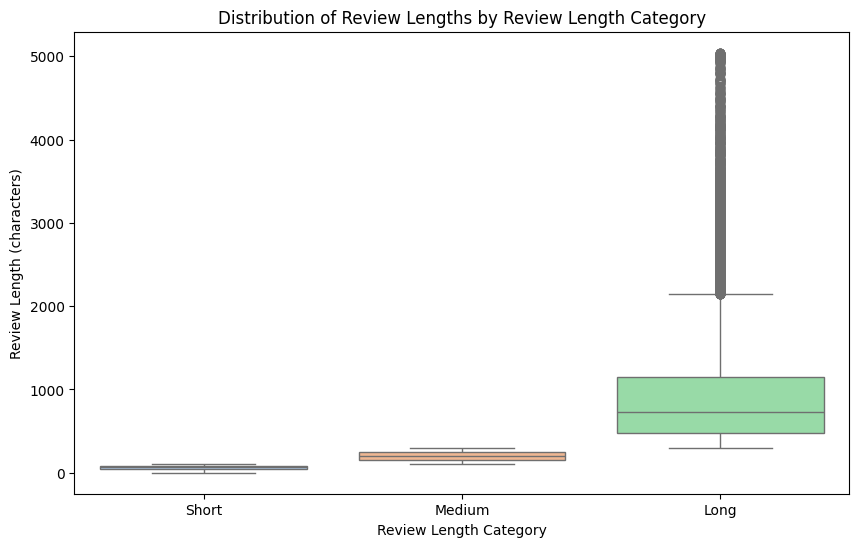

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Boxplot: distribution of review lengths by review length category
sns.boxplot(
    data=yelp_df_sampled,
    x='length_category',  # Short, Medium, Long
    y='review_length',
    palette='pastel'
)

plt.title("Distribution of Review Lengths by Review Length Category")
plt.xlabel("Review Length Category")
plt.ylabel("Review Length (characters)")
plt.show()


سناریو ۱۲: Pair Plot - روابط بین متغیرهای کاربران

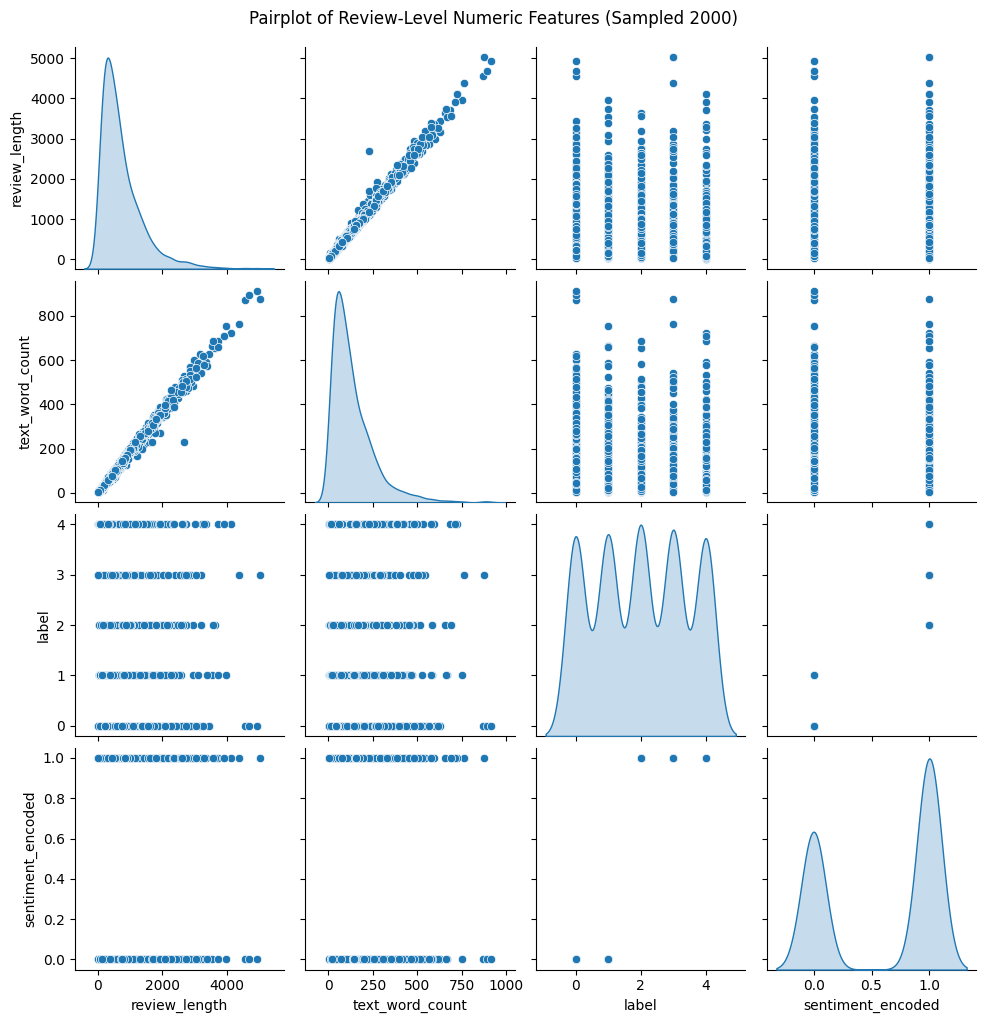

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create derived numeric features
yelp_df_sampled['sentiment_encoded'] = yelp_df_sampled['sentiment'].map({'negative':0, 'positive':1})
yelp_df_sampled['text_word_count'] = yelp_df_sampled['text'].apply(lambda x: len(x.split()))

# Select numeric features for pairplot
numeric_features = ['review_length', 'text_word_count', 'label', 'sentiment_encoded']

# Sample for speed
sample_df = yelp_df_sampled[numeric_features].sample(2000, random_state=42)

# Pairplot
sns.pairplot(sample_df, diag_kind='kde')
plt.suptitle("Pairplot of Review-Level Numeric Features (Sampled 2000)", y=1.02)
plt.show()


 سناریو ۱۳: Reg Plot - رابطه خطی محبوبیت و کیفیت

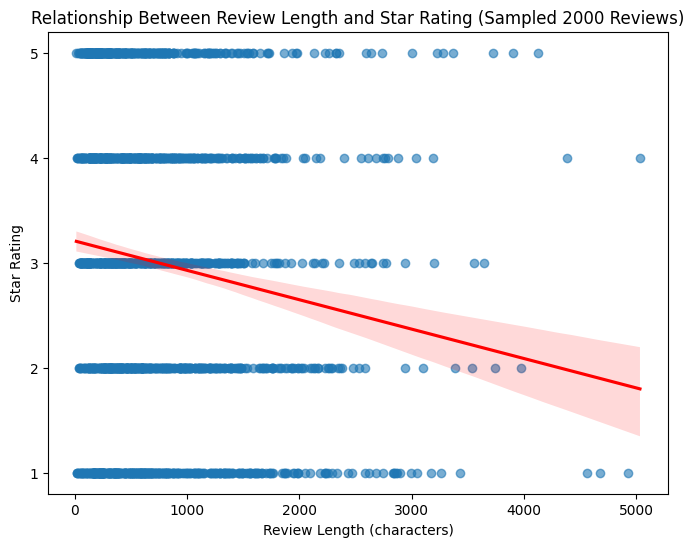

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample for speed
sample_df = yelp_df_sampled.sample(2000, random_state=42)

plt.figure(figsize=(8,6))
sns.regplot(
    data=sample_df,
    x='review_length',  # proxy for review_count
    y='label',          # proxy for average stars
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)

plt.yticks([0,1,2,3,4], [1,2,3,4,5])
plt.title("Relationship Between Review Length and Star Rating (Sampled 2000 Reviews)")
plt.xlabel("Review Length (characters)")
plt.ylabel("Star Rating")
plt.show()


سناریو ۱۴: Joint Plot - رابطه محبوبیت و کیفیت با توزیع حاشیه‌ای

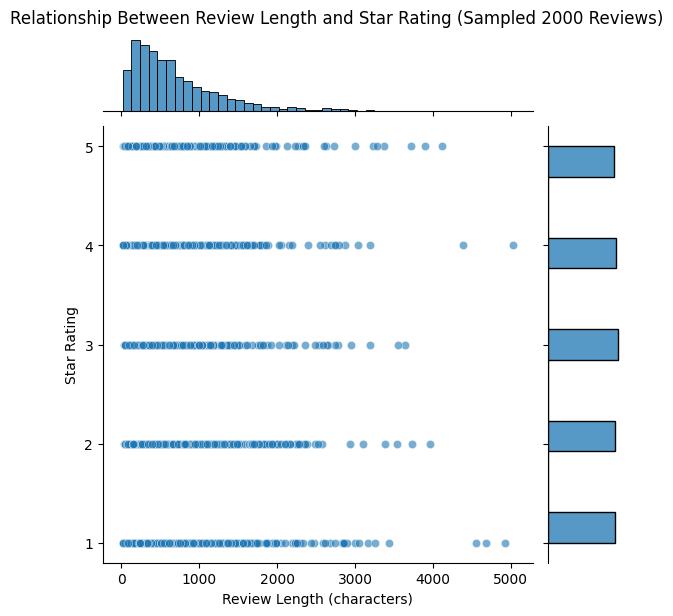

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample for speed
sample_df = yelp_df_sampled.sample(2000, random_state=42)

# Jointplot: review length vs star rating
sns.jointplot(
    data=sample_df,
    x='review_length',  # proxy for review_count
    y='label',          # proxy for average_stars
    kind='scatter',
    alpha=0.6
)

plt.yticks([0,1,2,3,4], [1,2,3,4,5])
plt.suptitle("Relationship Between Review Length and Star Rating (Sampled 2000 Reviews)", y=1.02)
plt.xlabel("Review Length (characters)")
plt.ylabel("Star Rating")
plt.show()


سناریو ۱۵: Heat Map - ماتریس همبستگی متغیرهای کاربران

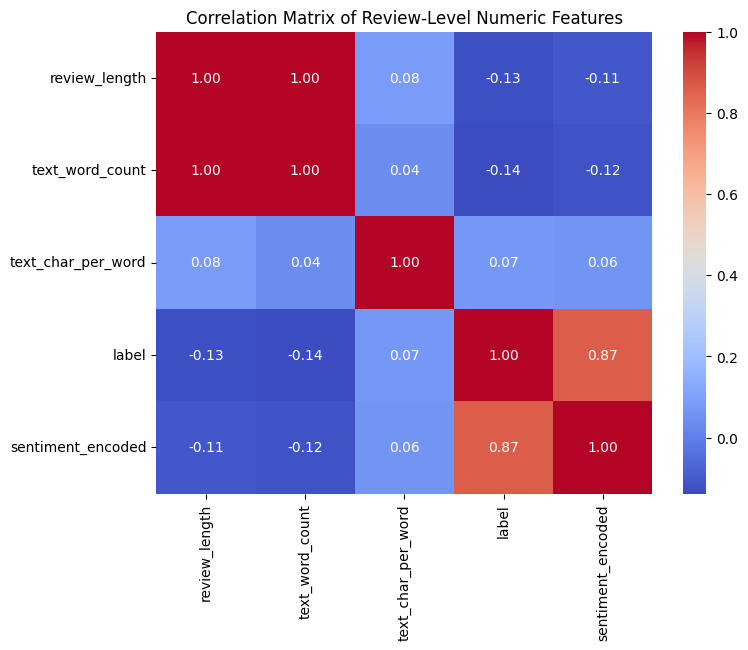

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Derived numeric features
yelp_df_sampled['sentiment_encoded'] = yelp_df_sampled['sentiment'].map({'negative':0,'positive':1})
yelp_df_sampled['text_word_count'] = yelp_df_sampled['text'].apply(lambda x: len(x.split()))
yelp_df_sampled['text_char_per_word'] = yelp_df_sampled['review_length'] / (yelp_df_sampled['text_word_count'] + 1)

# Select numeric features
numeric_features = ['review_length', 'text_word_count', 'text_char_per_word', 'label', 'sentiment_encoded']

# Compute correlation matrix
corr_matrix = yelp_df_sampled[numeric_features].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Review-Level Numeric Features")
plt.show()
